In [39]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# ML Data 나누기
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn import svm
from sklearn.svm import SVC
# Neural Net
from sklearn.neural_network import MLPClassifier
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 회귀모델
from sklearn.neighbors import KNeighborsRegressor
# 선형회귀
from sklearn.linear_model import LinearRegression
# 다중회귀
from sklearn.preprocessing import PolynomialFeatures

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn import datasets

# 표준화
from sklearn.preprocessing import StandardScaler
# Lasso (L1)
from sklearn.linear_model import Lasso
# Ridge (L2)
from sklearn.linear_model import Ridge

# Cluster
from sklearn.cluster import KMeans
# Voting
from sklearn.ensemble import VotingClassifier
# 정확도 측정
from sklearn.metrics import accuracy_score

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 특성(Feature)공학과 규제(Regularization:정형화, 규제, 일반화)

In [2]:
df = pd.read_csv('../Data/fish.csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:
# Numpy 변환
fish_full = df.to_numpy()
fish_full[:6]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32]])

In [4]:
df = pd.read_csv('../Data/fish_weight.csv')
df.head()

,weight
0,5.9
1,32.0
2,40.0
3,51.5
4,70.0


In [5]:
fish_weight = df.to_numpy()
fish_weight[:6]

array([[  5.9],
       [ 32. ],
       [ 40. ],
       [ 51.5],
       [ 70. ],
       [100. ]])

In [6]:
# Train, Test
train_input, test_input, train_target, test_target = train_test_split(fish_full, fish_weight, random_state=42)

### scikit learn 으로 다중회귀 분석하기

---
### 다항 특성 만들기 연습

In [8]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


$1: 절편, 2: x, 3: y, 4: x^2, 5: x*y, 6: y^2$

In [9]:
# 절편이 필요 없는 경우
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [11]:
# train_input을 다항 특성 만들기
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [14]:
train_poly[0:5]

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276]])

In [16]:
# 컬럼 정보 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [17]:
# test_input을 다항 특성으로 만들기
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

---
### 다중 회귀 모델 훈련하기

In [18]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print('Train score :', lr.score(train_poly, train_target))
print('Test score :', lr.score(test_poly, test_target))

Train score : 0.9903183436982125
Test score : 0.9714559911594168


---
### 더 많은 특성 만들기

In [19]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [20]:
lr.fit(train_poly, train_target)
print('Train score :', lr.score(train_poly, train_target))
print('Test score :', lr.score(test_poly, test_target))

Train score : 0.9999999999989608
Test score : -144.40490464808016


### 규제 전에 표준화
: 표준점수(Z점수)를 사용

In [25]:
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### Ridge(L2 규제) 회귀
: 가중치의 제곱으로 규제하는 방법

In [26]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print('Train score :', ridge.score(train_scaled, train_target))
print('Test score :', ridge.score(test_scaled, test_target))

Train score : 0.9896101671037343
Test score : 0.9790693977615388


### 적절한 규제 강도(Hyper parameter) 찾기

In [35]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 1, 10, 100, 1000]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

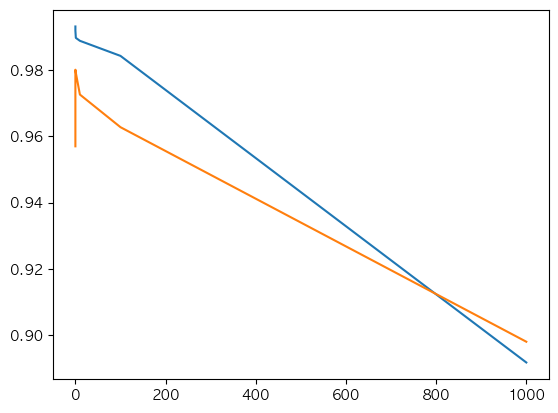

In [36]:
# 시각화
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)

plt.show()

> x축의 데이터 범위가 너무커서 소수인 경우에는 확인할 수 없음

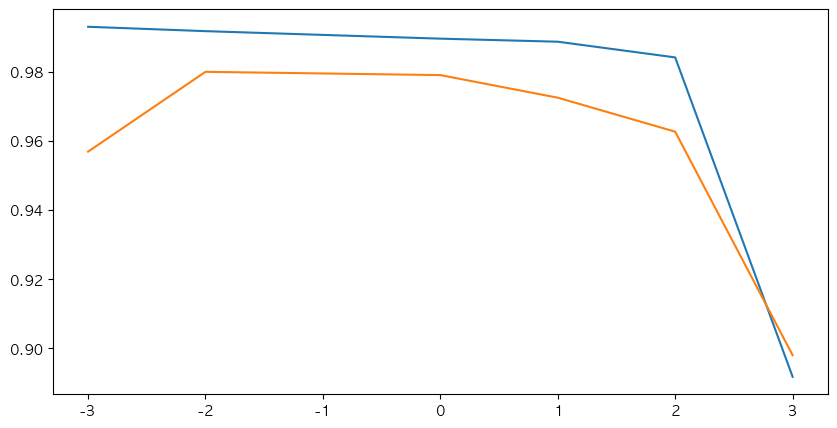

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.show()

alpha가 -1인 경우가 train과 test가 제일 가깝다. <- 골디락스(Goldilocks)</br>
-1은 0.1입니다.

In [38]:
ridge = Ridge(alpha=0.1) # default : alpha = 1
ridge.fit(train_scaled, train_target)
print('Train score :', ridge.score(train_scaled, train_target))
print('Test score :', ridge.score(test_scaled, test_target))

Train score : 0.9903815817570366
Test score : 0.9827976465386955


---
### L1규제(Lasso) 회귀
: 가중치의 절대값으로 규제하는 방법

In [40]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print('Train score :', lasso.score(train_scaled, train_target))
print('Test score :', lasso.score(test_scaled, test_target))

Train score : 0.989789897208096
Test score : 0.9800593698421884


In [41]:
# 최적값 찾기
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 1, 10, 100, 1000]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

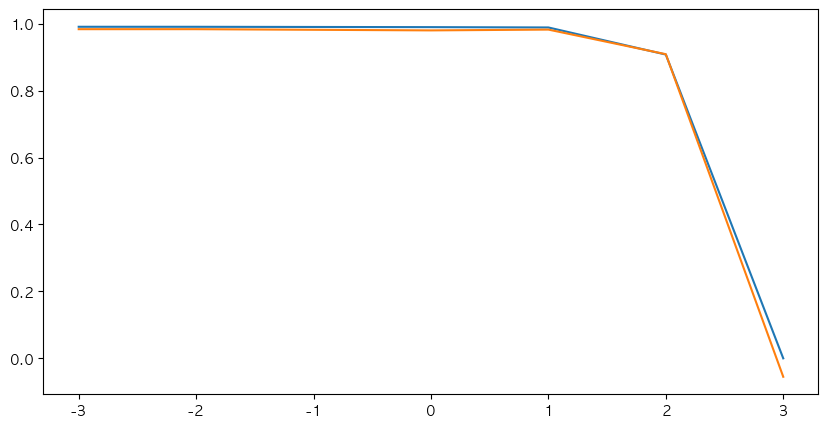

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.show()

In [47]:
lasso = Lasso(alpha=1)
lasso.fit(train_scaled, train_target)
print('Train score :', lasso.score(train_scaled, train_target))
print('Test score :', lasso.score(test_scaled, test_target))

Train score : 0.989789897208096
Test score : 0.9800593698421884


> lasso인 경우에 기울기(가중치:weight)를 0으로 변경하는 경우가 발생한다.

In [49]:
# 기울기가 0인 경우
np.sum(lasso.coef_ == 0)

42